In [26]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_clean = pd.read_csv(r"C:\\Users\\dell\\Desktop\\Week1_challenge_data_source.csv", encoding="latin-1")

In [7]:
df_clean=df_clean.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})

sum_column = df_clean["totalUL"] + df_clean["totalDL"]


google = df_clean['Google DL (Bytes)']+ df_clean['Google UL (Bytes)']
email = df_clean['Email DL (Bytes)']+ df_clean['Email UL (Bytes)']
gaming = df_clean['Gaming DL (Bytes)']+ df_clean['Gaming UL (Bytes)']
youtube = df_clean['Youtube DL (Bytes)']+ df_clean['Youtube UL (Bytes)']
netflix = df_clean['Netflix DL (Bytes)']+ df_clean['Netflix UL (Bytes)']
social = df_clean['Social Media DL (Bytes)']+ df_clean['Social Media UL (Bytes)']

df_clean['google']=google
df_clean['email']=email
df_clean['gaming']=gaming
df_clean['youtube']=youtube
df_clean['netflix']=netflix
df_clean['social']=social

relevant_data=df_clean[['msisdn','dur','totalUL', 'totalDL', 'google','email','gaming','youtube','netflix','social']]

#### building a dataframe containg the relevant variables

In [8]:
relevant_data.describe()

,msisdn,dur,totalUL,totalDL,google,email,gaming,youtube,netflix,social
count,1.489350e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,4.188282e+10,1.046086e+05,4.112121e+07,4.546434e+08,7.807295e+06,2.259102e+06,4.303331e+08,2.264348e+07,2.262861e+07,1.828250e+06
std,2.447443e+12,8.103762e+04,1.127639e+07,2.441429e+08,3.516420e+06,1.071109e+06,2.440199e+08,9.246800e+06,9.260820e+06,1.035646e+06
min,3.360100e+10,7.142000e+03,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03
25%,3.365130e+10,5.744050e+04,3.322201e+07,2.431068e+08,4.943599e+06,1.359344e+06,2.187279e+08,1.599846e+07,1.597946e+07,9.322180e+05
50%,3.366371e+10,8.639900e+04,4.114331e+07,4.558411e+08,7.812835e+06,2.263567e+06,4.316150e+08,2.266177e+07,2.263554e+07,1.826471e+06
75%,3.368349e+10,1.324302e+05,4.903424e+07,6.657055e+08,1.068280e+07,3.159818e+06,6.414159e+08,2.929260e+07,2.929044e+07,2.727487e+06
max,8.823971e+14,1.859336e+06,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06


## Insights

I)   Users download more than they upload
II)  Users upload data is more distributed than the download data
III) Users spend more on games than on social medial and other platforms

<AxesSubplot:>

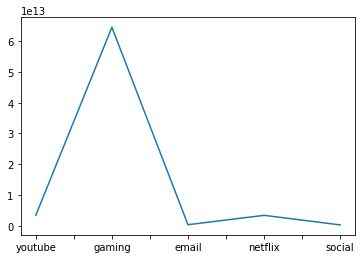

In [13]:
relevant_data[['youtube','gaming','email','netflix','social']].sum().plot(kind='line')

<AxesSubplot:title={'center':'Top user application engagment'}, ylabel='None'>

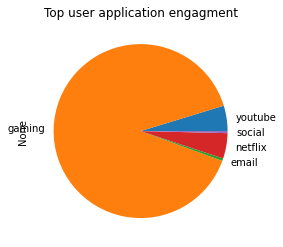

In [19]:
relevant_data[['youtube','gaming','email','netflix','social']].sum().plot(kind='pie', title="Top user application engagment")

##### The above plots show that users spend more time on gaming and then after youtube

In [24]:
corelation =  relevant_data[['email','gaming','youtube','social','netflix']].corr() 
corelation.style.background_gradient(cmap = "cool")

,email,gaming,youtube,social,netflix
email,1.000000,-0.000644,-0.002919,0.004032,0.001029
gaming,-0.000644,1.000000,-0.002999,0.001082,-0.003109
youtube,-0.002919,-0.002999,1.000000,0.000548,0.002882
social,0.004032,0.001082,0.000548,1.000000,0.001013
netflix,0.001029,-0.003109,0.002882,0.001013,1.000000


#### few insights from corelation table

I) There is a positive corelation between social media and email which is 0.004 far higher than relation to others
II) There is negative corelation between gaming and email which is -0.0006, those who use gaming apps dont use much emails


## Univariate Analysis

(array([13998., 15338., 15146., 15238., 14935., 15451., 15322., 15122.,
        15376., 14075.]),
 array([3.06358000e+05, 8.61960006e+07, 1.72085643e+08, 2.57975286e+08,
        3.43864928e+08, 4.29754571e+08, 5.15644214e+08, 6.01533856e+08,
        6.87423499e+08, 7.73313141e+08, 8.59202784e+08]),
 <BarContainer object of 10 artists>)

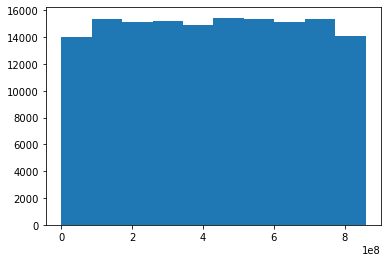

In [28]:
plt.hist(relevant_data['gaming'], bins=10)


(array([ 4804., 13896., 18884., 18694., 18710., 18825., 18911., 19092.,
        13694.,  4491.]),
 array([   8359. ,  459326.7,  910294.4, 1361262.1, 1812229.8, 2263197.5,
        2714165.2, 3165132.9, 3616100.6, 4067068.3, 4518036. ]),
 <BarContainer object of 10 artists>)

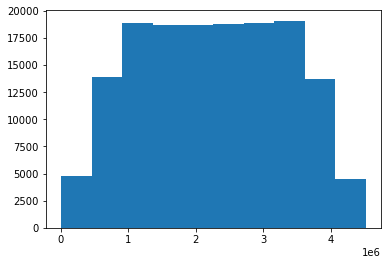

In [29]:
plt.hist(relevant_data['email'], bins=10)

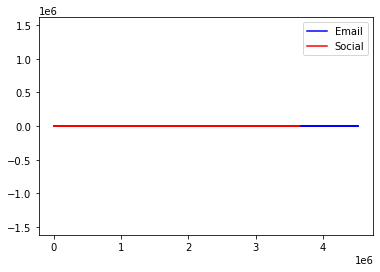

In [40]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(relevant_data['email'], np.zeros_like(relevant_data['email']), '-b', label='Email')
ax.plot(relevant_data['social'], np.zeros_like(relevant_data['social']), '-r', label='Social')
ax.axis('equal')
leg = ax.legend();

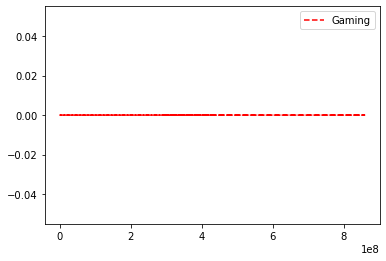

In [42]:
plt.plot(relevant_data['gaming'], np.zeros_like(relevant_data['gaming']), '--r', label="Gaming")
plt.legend()